In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [0]:
plt.rcParams['figure.figsize'] = (20, 12)

In [4]:
os.getcwd()

'/content'

In [0]:
os.chdir('/content/drive/My Drive/Image-Compression-K-Means')

In [6]:
os.getcwd()

'/content/drive/My Drive/Image-Compression-K-Means'

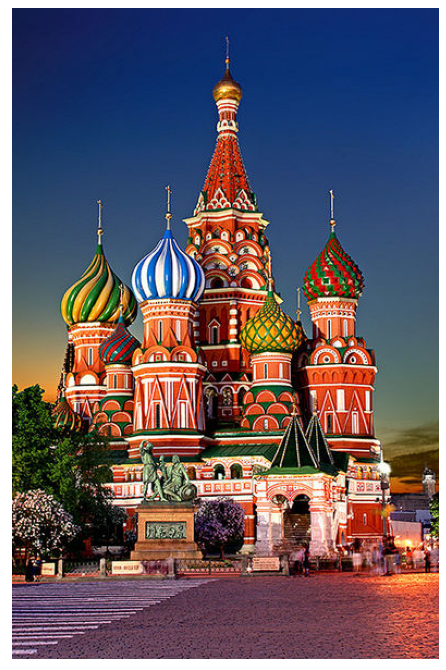

In [7]:
img = io.imread('images/1-Saint-Basils-Cathedral.jpg')
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(img);

In [8]:
img.shape

(600, 394, 3)

In [9]:
img_data = (img/255.0).reshape(-1, 3)
img_data.shape

(236400, 3)

In [0]:
from plot_utils import plot_utils

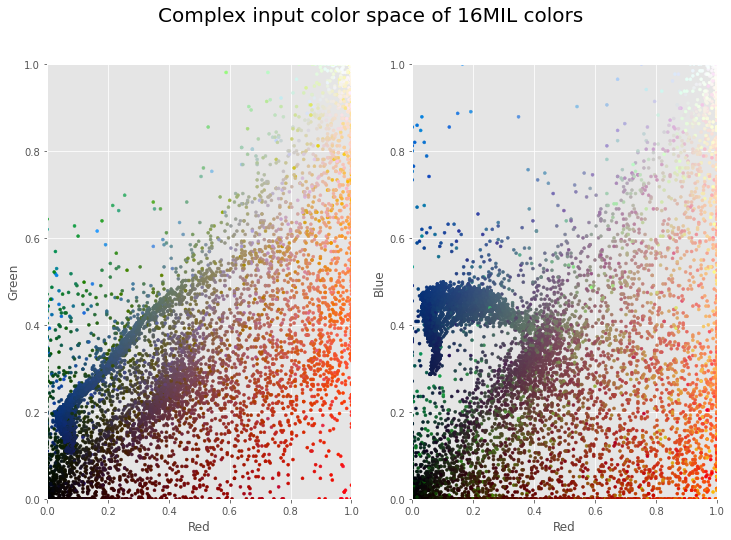

In [11]:
x = plot_utils(img_data, title = 'Complex input color space of 16MIL colors')
x.colorSpace()

In [0]:
#Due to complexity of CSpace, apply Minibatch K Means
from sklearn.cluster import MiniBatchKMeans

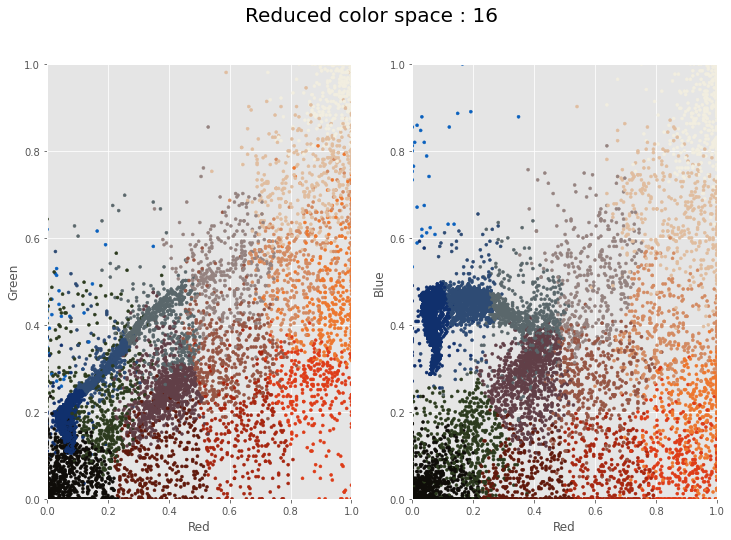

In [13]:
kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

y = plot_utils(img_data, colors = k_colors, title = 'Reduced color space : 16')
y.colorSpace()

In [0]:
img_dir = 'images/'

In [17]:
@interact

def color_compression(image = os.listdir(img_dir), k = IntSlider(min = 1, max = 256, step = 1,
                                                                 value = 16, continuous_update = False,
                                                                 layout = dict(width = '100%'))):
  input_img = io.imread(img_dir + image)
  img_data = (input_img / 255.0).reshape(-1, 3) 

  kmeans = MiniBatchKMeans(k).fit(img_data)
  k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)] 

  k_img = np.reshape(k_colors, (input_img.shape))

  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.suptitle('K-Means Image Compression', fontsize = 20)

  ax1.set_title('Compressed')
  ax1.set_xticks([])
  ax1.set_yticks([])
  ax1.imshow(k_img)

  ax2.set_title('Original (16,777,216 colors')
  ax2.set_xticks([])
  ax2.set_yticks([])
  ax2.imshow(input_img)  

  plt.subplots_adjust(top = 0.75)
  plt.show()

interactive(children=(Dropdown(description='image', options=('3-peacock.jpg', '4-GoldenGateBridge.jpg', '2-new…